In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [2]:
# Cargamos el dataframe
df = pd.read_csv('data/train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
df.shape

(240000, 22)

In [4]:
df.head(2)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00


In [5]:
# Veo la cantidad de elementos nulos de cada columna
display(df.isnull().sum())

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

# Optimizando los tipos de datos
### Integers
<span style="font-weight:600;">Lleno los elementos nulos de tipo tipo float con el valor -1, para que sea un valor valido para la conversion a int, pero al no coincidir con los valores reales de las columnas luego los paso a nan</span>

In [6]:
df[['antiguedad','habitaciones','garages','banos','idzona']] = df[['antiguedad','habitaciones','garages','banos','idzona']].fillna(-1)

<span style="font-weight:600;">Cambio el tipo de todas las columnas que son float y que en verdad se representan en int</span>

In [7]:
df[['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio']] = pd.DataFrame(df, columns=['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio'], dtype=int)

<span style="font-weight:600;">Paso del tipo de dato int64 que se coloco en el paso anterior , y lo downcasteo a el minimo posible para cada columna (int32, int16, etc) , y recupero los datos nulos</span>

In [8]:
df[['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio']] = df[['antiguedad', 'habitaciones', 'garages', 'banos', 'idzona', 'precio']].apply(pd.to_numeric, downcast='integer').replace(-1, np.nan)

### Floats
<span style="font-weight:600;">Lleno los elementos nulos de tipo tipo float con el valor -1, para que sea un valor valido, pero que sea facil de identificar como valor vacio, al no coincidir con los valores reales de las columnas luego los paso a nan</span>

In [9]:
df[['metroscubiertos','metrostotales']] = df[['metroscubiertos','metrostotales']].fillna(-1)

<span style="font-weight:600;">Downcasteo a el minimo posible para cada columna (float32, float16, etc) y recupero los nulos</span>

In [10]:
df[['metroscubiertos', 'metrostotales']] = df[['metroscubiertos', 'metrostotales']].apply(pd.to_numeric,downcast='float').replace(-1, np.nan)

### Booleans y Category
<span style="font-weight:600;">Cambio el tipo de dato de todas las columnas booleanas a int 1/0 y la columna que se representa como category</span>

In [11]:
df[['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos']] = pd.DataFrame(df, columns=['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos'], dtype=int).apply(pd.to_numeric, downcast='integer')
df = df.astype({'tipodepropiedad': 'category'})

## Resultado
### Tipo de datos final para cada columna

In [12]:
df.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float32
metrostotales                        float32
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                int8
usosmultiples                           int8
piscina                                 int8
escuelascercanas                        int8
centroscomercialescercanos              int8
precio                                 int32
dtype: obj

### Cantidad de nulos por columna

In [13]:
display(df.isnull().sum())

titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

# Analisis de datos

### Ordeno las filas por Fecha , id y precio

In [14]:
df = df.sort_values(by=["fecha","id","precio"])

### Cantidad de publicaciones de venta por año

In [15]:
publicacionesXanios = pd.DataFrame(df[['fecha']], columns=['fecha'])
publicacionesXanios = publicacionesXanios["fecha"].groupby(publicacionesXanios['fecha'].dt.year).agg({'count'})
publicacionesXanios

,count
fecha,
2012,23534
2013,30386
2014,40572
2015,51470
2016,94038


## Llenando valores de metros

#### Busco las filas que tengan "metrostotales" null, pero con valores validos en "metroscubiertos" para ver si hay posibilidad de llenar los null con el valor de esa segunda columna

#### Verifico lo mismo para cuando "metroscubiertos" es null, pero con valores validos en "metrostotales".


In [16]:
print('________________________________________________________________________________')
print('Cantidad de "metrostotales" nulos ' + str(df['metrostotales'].isnull().sum()))
nullosLimpiables = df[ df['metrostotales'].isnull() & df['metroscubiertos'].notnull()]
coincidencias = nullosLimpiables.shape[0]
print('Cantidad de "metrostotales" nullos, con valores en "metroscubiertos" : ' + str(coincidencias))
print('________________________________________________________________________________')
print('Cantidad de "metroscubiertos" nulos ' + str(df['metroscubiertos'].isnull().sum()))
nullosLimpiables = df[ df['metroscubiertos'].isnull() & df['metrostotales'].notnull()]
coincidencias = nullosLimpiables.shape[0]
print('Cantidad de "metroscubiertos" nullos, con valores en "metrostotales" : ' + str(coincidencias))
print('________________________________________________________________________________')

________________________________________________________________________________
Cantidad de "metrostotales" nulos 51467
Cantidad de "metrostotales" nullos, con valores en "metroscubiertos" : 51467
________________________________________________________________________________
Cantidad de "metroscubiertos" nulos 17400
Cantidad de "metroscubiertos" nullos, con valores en "metrostotales" : 17400
________________________________________________________________________________


#### Dado que tengo posiblidades de poder llenar los campos nullos con valores que son posiblemente verdaderos, procedo a hacer un analisis mas en detalle para encontrar los diferentes casos que pueden darse.

### Cantidad de nulos al principio del proceso:

In [17]:
metros = df.copy()
metros['totalesNull'] = np.where(metros['metrostotales'].isnull(), True, False)
metros['cubiertosNull'] = np.where(metros['metroscubiertos'].isnull(), True, False)
display(metros[['metrostotales','metroscubiertos']].isnull().sum())

metrostotales      51467
metroscubiertos    17400
dtype: int64

#### Caso metros totales en NULL:
##### Sin importar el tipo de propiedad, si el campo de metros totales se encontraba en null pero el campo de metros cubietos tiene datos, se llenara los nulls con los estos.
#### Caso metros cubiertos en NULL:
##### Para los tipos de propiedad como terrenos , huertas etc, en los cuales es mas posible que el valor de "metroscubiertos" sea 0 incluso si hay datos en "metrostotales", procedo a ver la correlacion de esos casos, pare ver si: 
#### *) llenar con 0 la columna de "metroscubiertos"
#### *) o si la hipotesis es falsa y la correlacion es alta, llenaria los null con el valor de la columna "metrostotales"

#### Caso "metrostotales" en NULL
##### remplazo los null

In [18]:
metros['metrostotales'] = np.where(metros['metrostotales'].isnull() & metros['metroscubiertos'].notnull(), metros['metroscubiertos'], metros['metrostotales'])
print('Cantidad de "metrostotales" nulos ' + str(metros['metrostotales'].isnull().sum()))

Cantidad de "metrostotales" nulos 0


#### Caso "metroscubiertos" en NULL

##### Veo la correlacion entre los "metros totales" y "metros cubiertos" en general

In [19]:
metros['metrostotales'].corr(metros['metroscubiertos'])

0.8173939329855918

#### Correlacion entre "metroscubiertos" y  "metrostotales" en las propiedades que podrian llegar a tener 0 en "metroscubiertos" pero valores en "metrostotales".
#### Como propiedades de estilo Terreno, Huerta, u Otros

In [20]:
propiedadesExteriores = metros.loc[(metros['tipodepropiedad'] == 'Terreno') | 
              (metros['tipodepropiedad'] == 'Terreno comercial') |
              (metros['tipodepropiedad'] == 'Rancho') |
              (metros['tipodepropiedad'] == 'Otros') |
              (metros['tipodepropiedad'] == 'Terreno industrial') |
              (metros['tipodepropiedad'] == 'Huerta') |
              (metros['tipodepropiedad'] == 'Garage'), ['metroscubiertos','metrostotales', 'tipodepropiedad']]
propiedadesExteriores = propiedadesExteriores.dropna()
pe = propiedadesExteriores

In [21]:
print('Cantidad de "metroscubiertos" de valor 0: ' 
      + str(len(pe[pe['metroscubiertos'] == 0])))

Cantidad de "metroscubiertos" de valor 0: 0


In [22]:
print("Terreno: " + str(pe[pe['tipodepropiedad'] == 'Terreno']['metrostotales'].corr(pe[pe['tipodepropiedad'] == 'Terreno']['metroscubiertos'])))
print("Terreno comercial: " + str(pe[pe['tipodepropiedad'] == 'Terreno comercial']['metrostotales'].corr(pe[pe['tipodepropiedad'] == 'Terreno comercial']['metroscubiertos'])))
print("Otros: " + str(pe[pe['tipodepropiedad'] == 'Otros']['metrostotales'].corr(pe[pe['tipodepropiedad'] == 'Otros']['metroscubiertos'])))
print("Terreno industrial: " + str(pe[pe['tipodepropiedad'] == 'Terreno industrial']['metrostotales'].corr(pe[pe['tipodepropiedad'] == 'Terreno industrial']['metroscubiertos'])))
print("Huerta: " + str(pe[pe['tipodepropiedad'] == 'Huerta']['metrostotales'].corr(pe[pe['tipodepropiedad'] == 'Huerta']['metroscubiertos'])))
print("Garage: " + str(pe[pe['tipodepropiedad'] == 'Garage']['metrostotales'].corr(pe[pe['tipodepropiedad'] == 'Garage']['metroscubiertos'])))

Terreno: 0.7890031546288713
Terreno comercial: 0.6992153368735061
Otros: 0.816746665143214
Terreno industrial: 0.5940355360229522
Huerta: 0.9999999999999999
Garage: nan


C:\Users\ivo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ivo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### Se puede ver que hay una gran correlacion entre los metroscubiertos y los metrostotales incluso en este tipo de propiedades, con expepcion de los "Terreno industrial" y "Terreno comercial que son relativamente bajos en comparacion.
#### La correlacion de Garage da nan, pero como se puede ver mas abajo, le corresponderia un 1.

In [23]:
pe[pe['tipodepropiedad'] == 'Garage']

,metroscubiertos,metrostotales,tipodepropiedad
id,,,
245563,40.00,40.00,Garage


#### Vista la gran correlacion en la mayoria de los casos entre "metrostotales" y "metroscubiertos" con un par de exepciones, procedo a llenar los nullos con el valor de la columna que si tiene datos. 

In [24]:
metros['metroscubiertos'] = np.where(metros['metroscubiertos'].isnull() & metros['metrostotales'].notnull(), metros['metrostotales'], metros['metroscubiertos'])
print('Cantidad de "metroscubiertos" nulos ' + str(metros['metroscubiertos'].isnull().sum()))

Cantidad de "metroscubiertos" nulos 0


### Cantidad de nulos al final del proceso:

In [25]:
display(metros[['metrostotales','metroscubiertos']].isnull().sum())

metrostotales      0
metroscubiertos    0
dtype: int64

## Analisis por region

In [26]:
Noroeste = ['Baja California Norte', 'Baja California Sur','Chihuahua', 'Durango', 'Sinaloa', 'Sonora']
Noreste = ['Coahuila','Nuevo León', 'Tamaulipas']
Oeste = ['Colima', 'Jalisco', 'Michoacán', 'Nayarit']
Este = ['Hidalgo', 'Puebla', 'Tlaxcala', 'Veracruz']
Centronorte = ['Aguascalientes', 'Guanajuato', 'Querétaro', 'San luis Potosí', 'Zacatecas']
Centrosur = ['Edo. de México', 'Distrito Federal', 'Morelos']
Suroeste = ['Chiapas', 'Guerrero', 'Oaxaca']
Sureste = ['Campeche', 'Quintana Roo', 'Tabasco', 'Yucatán']

In [27]:
def region(provincia):
    if(provincia in Noroeste):
        return 'Noroeste'
    if(provincia in Noreste):
        return 'Noreste'
    if(provincia in Oeste):
        return 'Oeste'
    if(provincia in Este):
        return 'Este'
    if(provincia in Centronorte):
        return 'Centronorte'
    if(provincia in Centrosur):
        return 'Centrosur'
    if(provincia in Suroeste):
        return 'Suroeste'
    return 'Sureste'

In [28]:
df['region'] = df['provincia'].apply(region)
df = df.astype({'region': 'category'})

In [29]:
df.groupby(['region']).agg({'precio':'mean'}).sort_values('precio', ascending = False)

,precio
region,
Centrosur,3117324.11
Noreste,2385799.88
Suroeste,2239709.74
Oeste,2202275.16
Sureste,2180047.40
Centronorte,2014186.84
Este,1997588.50
Noroeste,1368329.94


In [30]:
reg_cs = df[ df['region'] == 'Centrosur']['precio']
reg_cn = df[ df['region'] == 'Centronorte']['precio']
reg_o = df[ df['region'] == 'Oeste']['precio']
reg_ne = df[ df['region'] == 'Noreste']['precio']
reg_e = df[ df['region'] == 'Este']['precio']
reg_se = df[ df['region'] == 'Sureste']['precio']
reg_no = df[ df['region'] == 'Noroeste']['precio']
reg_so = df[ df['region'] == 'Suroeste']['precio']

data = {'Centrosur':reg_cs, 'Noreste':reg_ne, 'Suroeste':reg_so, 'Oeste':reg_o, 'Sureste':reg_se, 'Centronorte':reg_cn, 'Este':reg_e, 'Noroeste':reg_no}

<div style="display: flex; flex-direction: row; align-items: center;">
    <img src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Regions_of_Mexico.svg/350px-Regions_of_Mexico.svg.png" width="350" height="235" style="margin:0px;"/>
    <div style="margin-left:10px;">
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#EF9BA0; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span>Noroeste</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#FF9900; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Noreste</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#F5DD00; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Oeste</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#00AAD4; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Centronorte</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#D42AFF; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Este</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#FFFFFF; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Centrosur</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#CCFF00; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Sureste</span>
        </span>
        <span style="margin:0px; padding-bottom:1px; font-size:90%; display:block;">
            <span style="border: 1px solid; border-color: black; background-color:#8080FF; color:white">
                &nbsp;&nbsp;&nbsp;&nbsp;
            </span>
            &nbsp;
            <span >Suroeste</span>
        </span>
    </div>
</div>

#### Distribucion de los precios (MEX) para cada region. Se puede observar q la region con mas cantidad de propiedades de valor alto corresponden a la region Centro Sur , en donde se encuentra la capital

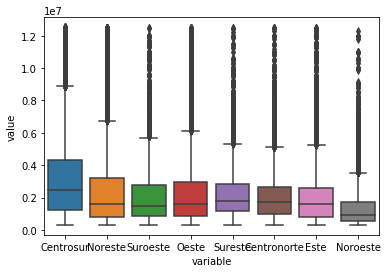

In [31]:
precioXregion = pd.DataFrame(data)
sns.boxplot(x="variable", y="value", data=pd.melt(precioXregion), dodge=True)

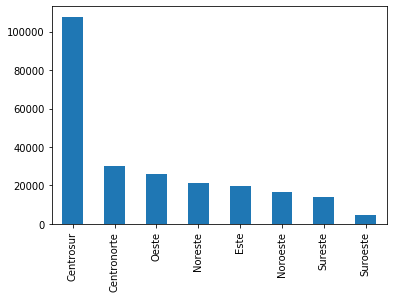

In [32]:
#cantidad de propiedades por region
df['region'].value_counts().plot(kind='bar')

#### La region del Centro-Sur a pesar de ser de las regiones con menos cantidad de regiones que la componen y la menor en cuento a territorio, es la region que tiene la mayor cantidad de publicaciones, siendo que el total de publicaciones del resto de Mexico es alrededor de 132 mil y la region del Centro-Sur es de 107 mil.
#### Aparte de ser la region con mas publiciaciones, se destaca por tener la mayoria de las propiedades con los valores mas altos de Mexico, esto posiblemente se debe a que esta pequeña region abarca la capital de Mexico.

In [33]:
df['region'].value_counts()

Centrosur      107734
Centronorte     30142
Oeste           26069
Noreste         21322
Este            19543
Noroeste        16579
Sureste         14096
Suroeste         4515
Name: region, dtype: int64